In [1]:
from qiskit import *
from math import pi
import numpy as np
from qiskit.aqua.operators import CircuitStateFn
from qiskit.aqua.operators.gradients import QFI
from qiskit.circuit import QuantumCircuit, ParameterVector, Parameter

In [2]:
numQubits = 4  #Number of Qubits in the circuit
numParametrisedLayers = 2

In [3]:
X = np.random.uniform(-1, 1, numQubits)  #data vector X, normalised between [-1, 1]

In [4]:
params = ParameterVector('θ_', length = numQubits*numParametrisedLayers) #vector of parameters (for the Variational Circuit)
theta_iter = iter(params) #iterates over the instances of vector "params"

In [5]:
def add_layerRZ():
    for i in range(numQubits):
        qf.rz(X[i], i)
    qf.barrier()

In [6]:
def add_layerRZZ():
    for i in range(0, numQubits-1):
        for j in range(i+1, numQubits):
            qf.cx(i, j)
            qf.rz((pi-X[i])*(pi-X[j]), j)
            qf.cx(i, j)
        qf.barrier()

In [7]:
def make_feature_map():
    for i in range(numQubits):
        qf.h(i)
    qf.barrier()
    add_layerRZ()
    add_layerRZZ()

In [8]:
def add_cnots():
    for i in range(0, numQubits-1):
        for j in range(i+1, numQubits):
            qf.cx(i, j)
    qf.barrier()

In [9]:
def add_layerRY():
    for qubit in range(numQubits):
        qf.ry(next(theta_iter), qubit)
    qf.barrier()

In [10]:
def make_variationalCircuit():
    add_layerRY()
    add_cnots()
    add_layerRY()

In [11]:
qf = QuantumCircuit(QuantumRegister(numQubits)) 

In [12]:
def make_final_circuit():
    make_feature_map()
    make_variationalCircuit()

In [13]:
make_final_circuit()

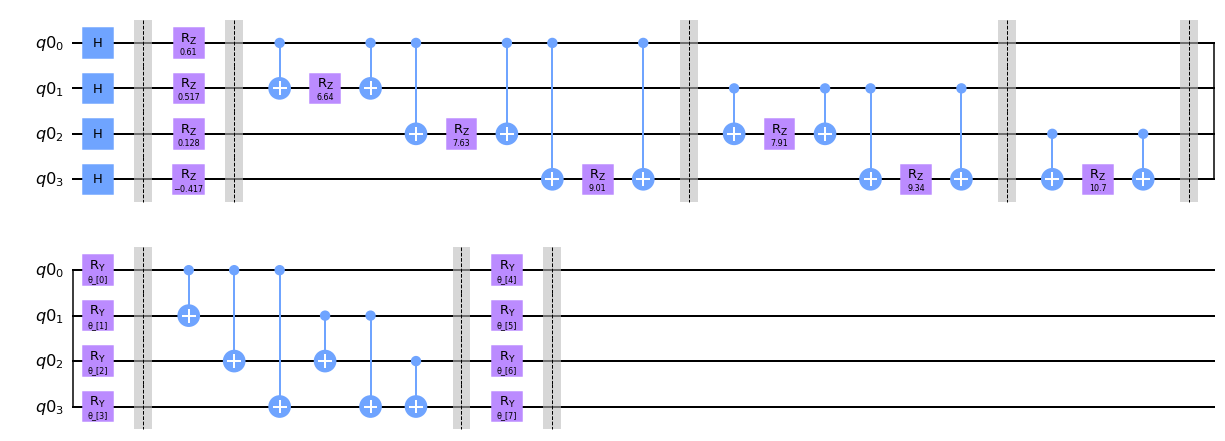

In [14]:
qf.draw('mpl')

In [15]:
state = CircuitStateFn(primitive=qf, coeff=1.)

In [16]:
qfi = qiskit.aqua.operators.gradients.QFI(qfi_method='lin_comb_full').convert(operator=state, params=params.params)

In [17]:
values_dict = {params: np.random.uniform(-1, 1, numQubits*numParametrisedLayers)} 

In [18]:
qfi_result = qfi.assign_parameters(values_dict).eval()

In [19]:
print('full QFI \n', np.real(np.array(qfi_result)))

full QFI 
 [[ 9.88165246e-01  6.41897542e-01  7.52622570e-02  6.59569517e-01
  -1.05942869e-01  1.17237596e-02 -2.66693194e-01 -6.31003114e-02]
 [ 6.41897542e-01  9.99378706e-01  6.61113453e-02  6.84023040e-01
  -9.15541128e-04  2.32764154e-01 -8.14210994e-03 -1.17763421e-02]
 [ 7.52622570e-02  6.61113453e-02  9.99999833e-01  2.31028354e-03
  -1.50200420e-05 -4.40685948e-05 -1.96452191e-01  1.89044215e-04]
 [ 6.59569517e-01  6.84023040e-01  2.31028354e-03  9.90242417e-01
  -3.62827635e-03 -1.06453124e-02 -3.22670648e-02  4.82849536e-02]
 [-1.05942869e-01 -9.15541128e-04 -1.50200420e-05 -3.62827635e-03
   9.98650856e-01 -1.36133485e-01 -4.95298685e-02 -1.73199933e-01]
 [ 1.17237596e-02  2.32764154e-01 -4.40685948e-05 -1.06453124e-02
  -1.36133485e-01  9.88386194e-01  7.09900725e-02 -2.26951830e-01]
 [-2.66693194e-01 -8.14210994e-03 -1.96452191e-01 -3.22670648e-02
  -4.95298685e-02  7.09900725e-02  8.93296991e-01 -2.80529154e-02]
 [-6.31003114e-02 -1.17763421e-02  1.89044215e-04  4.82849